In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
import time

def compute_euclidean_distance(vec_1, vec_2):
    differences = np.subtract(vec_1, vec_2)
    diffsquare = differences ** 2
    
    sums = np.sum(diffsquare)
    
    distance=np.sqrt(sums)
    
    return distance

def initialise_centroids(dataset, k):
    centroids=np.zeros((k, 2)) # First, an empty array is created, of k length and 2 width to store k x and y values
    
    length = len(dataset)
    
    for i in range(0,k):
        dup = True
        while dup==True:
            dup=False # The 'dup' boolean is part of ensuring the algorithm isn't selecting the same centroid twice.
            num = rn.randint(0,length-1) # This random number is used to select a point from the dataset.
        
            point=dataset[num,:]
            for j in range(0,k):
                if((point==centroids[j,:]).all()):
                    dup=True
        centroids[i,:]=point # Once the while loop terminates, the point value is saved into centroids. This means centroids is never overwritten in the loop.
    
    return centroids

def kmeans(dataset, k):
    
    centroids=initialise_centroids(dataset,k)
    
    #centroids = np.array([(6.565, 3.03), (5.304, 2.754), (6.426, 3.366)])
    
    centroids = np.array([(6.464, 2.727),(5.454, 3.939),(4.488, 3.06)])
    
    length = len(dataset)
    
    print(centroids) # This line is for testing purposes, so you can see what the randomly calculated centroids are.
    
    ofv = []
    
    for a in range(0,100): # There is a hard limit of 100 iterations, so that the program cannot enter an infinite loop - if it is unable to stabilise after 100 attempts, it will terminate.
        
        old_centroids = centroids.copy() # This is so that the centroids this iteration can be compared to the last iteration's centroids.
        
        cluster_assigned = np.zeros(length)
        
        sums=np.zeros([k,2])
        sizes = np.zeros([k,1])
        edsum = 0
        
        for i in range(0,length): # This will run through every point in the dataset.
            
            point = dataset[i,:]
            cluster_assigned[i]=0
            assigned=0
            assignedDistance = compute_euclidean_distance(point, centroids[0,:])
            for j in range(1,k):
                
                newDistance = compute_euclidean_distance(point, centroids[j,:])
                
                if newDistance < assignedDistance: # Comparing the newly calculated distance to the current lowest - if it is lower, the cluster assignment and lowest distance are updated.
                    cluster_assigned[i]= j
                    assignedDistance = newDistance
                    assigned=j
            edsum = edsum + assignedDistance
            sums[assigned,:] = sums[assigned,:] + point #This is to summate the points in a cluster.
            
            sizes[assigned,0]= sizes[assigned,0]+1 # It can't be guaranteed that the clusters will be evenly sized, so an array storing how many points are in each cluster is necessary for calculating means.
        
        centroids = sums / sizes
        
        avgdis = edsum / length
        
        ofv.append(avgdis)
        
        if((centroids==old_centroids).all()):
            print('Completed in ', a, ' cycles') # This helps with testing, showing how many times the program tried to stabilise.
            break
        
        #clustPlot(centroids, cluster_assigned, a) # This line is for testing, to show the changing clusters.
        
    #print(centroids) # Also for testing purposes: so you can see the exact coordinates of the final centroids.
    
    #ofvplot(ofv)
    
    return centroids, cluster_assigned



def ofvplot(ofv):
    objfun = np.array(ofv)
    steps = np.arange(0,len(objfun), 1)
    
    
    plt.figure()
    plt.plot(steps, objfun, 'r')

    
def clustPlot(centroids, clusters, i):
    clusL = np.unique(clusters)
    
    print("----------------\n\nIteration Number: ", i)
    print(centroids)
    for i in clusL:
        plt.scatter(dataset[clusters==i, 0], dataset[clusters==i, 1])
        plt.scatter(centroids[:,0], centroids[:,1], marker='x')
    
    plt.show()

In [2]:
filename = 'Task2 - dataset - dog_breeds(1).csv'

data = pd.read_csv(filename)
height = data['height']
tail = data['tail length']
leg = data['leg length']
nose = data['nose circumference']




print(data)

     height  tail length  leg length  nose circumference
0     5.151        3.535       1.414               0.202
1     4.949        3.030       1.414               0.202
2     4.747        3.232       1.313               0.202
3     4.646        3.131       1.515               0.202
4     5.050        3.636       1.414               0.202
..      ...          ...         ...                 ...
295   6.834        3.060       5.304               2.346
296   6.426        2.550       5.100               1.938
297   6.630        3.060       5.304               2.040
298   6.324        3.468       5.508               2.346
299   6.018        3.060       5.202               1.836

[300 rows x 4 columns]


[[5.151 3.838]
 [5.1   3.672]]
Completed in  7  cycles
[[6.69445985 3.01273723]
 [5.28928834 3.17922086]]


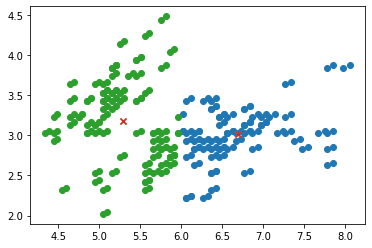

In [15]:

#Plot 1

dataset = np.zeros((len(data),2))
dataset[:,0]=height;
dataset[:,1]=tail;

k = 2
centroids, clusters = kmeans(dataset, k)
    
clusL = np.unique(clusters)
    
    
for i in clusL:
    plt.scatter(dataset[clusters==i, 0], dataset[clusters==i, 1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='x')
    
plt.show()

[[6.65721528 3.00328472]
 [5.26061538 3.19541667]]
 
 [[5.28928834 3.17922086]
 [6.69445985 3.01273723]]
 

[[5.508 3.774]
 [6.732 2.958]
 [4.896 3.06 ]]
Completed in  12  cycles
[[5.08109    3.47942   ]
 [6.91562766 3.11980851]
 [5.85959434 2.7335283 ]]
Average distance from cluster centre: 0.4254996538085799
[[6.969 3.131]
 [5.1   3.366]
 [5.1   3.264]]
Completed in  9  cycles
[[6.91562766 3.11980851]
 [5.08109    3.47942   ]
 [5.85959434 2.7335283 ]]
Average distance from cluster centre: 0.4254996538085799
[[5.555 2.424]
 [5.757 2.626]
 [7.14  3.264]]
Completed in  10  cycles
[[5.08109    3.47942   ]
 [5.86524299 2.73346729]
 [6.92048387 3.12403226]]
Average distance from cluster centre: 0.4257042015543983


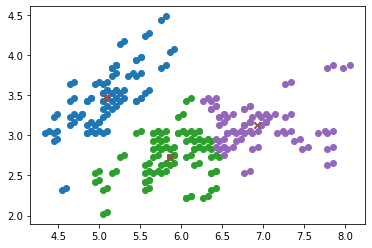

In [140]:
#Plot 2

dataset = np.zeros((len(data),2))
dataset[:,0]=height;
dataset[:,1]=tail;

k = 3
for a in range(0, 3):
    centroids, clusters = kmeans(dataset, k)
    
clusL = np.unique(clusters)
for i in clusL:
    plt.scatter(dataset[clusters==i, 0], dataset[clusters==i, 1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='x')

plt.show()

[[5.86524299 2.73346729]
 [5.08109    3.47942   ]
 [6.92048387 3.12403226]]

In [136]:
dataset = np.zeros((len(data),2))
dataset[:,0]=height;
dataset[:,1]=tail;

k = 3
for a in range(0,10):
    centroids, clusters = kmeans(dataset, k)

[[5.202 3.774]
 [5.151 2.525]
 [7.854 3.876]]
Completed in  4  cycles
[[5.08109    3.47942   ]
 [5.86524299 2.73346729]
 [6.92048387 3.12403226]]
Average distance from cluster centre: 0.4257042015543983
[[6.936 3.264]
 [5.712 2.856]
 [6.464 2.929]]
Completed in  20  cycles
[[6.92048387 3.12403226]
 [5.08109    3.47942   ]
 [5.86524299 2.73346729]]
Average distance from cluster centre: 0.4257042015543983
[[5.304 4.182]
 [5.353 3.737]
 [5.555 2.323]]
Completed in  15  cycles
[[5.08109    3.47942   ]
 [5.85959434 2.7335283 ]
 [6.91562766 3.11980851]]
Average distance from cluster centre: 0.4254996538085799
[[6.12  2.958]
 [6.464 2.929]
 [5.757 2.828]]
Completed in  14  cycles
[[5.86524299 2.73346729]
 [6.92048387 3.12403226]
 [5.08109    3.47942   ]]
Average distance from cluster centre: 0.4257042015543983
[[5.757 2.626]
 [7.854 2.856]
 [5.05  3.434]]
Completed in  13  cycles
[[5.86524299 2.73346729]
 [6.92048387 3.12403226]
 [5.08109    3.47942   ]]
Average distance from cluster centre: 

[[5.151 1.515]
 [5.202 1.53 ]]
Completed in  4  cycles
[[5.08045794 1.60201869]
 [6.40251813 5.04090674]]
Average distance from cluster centre: 0.7085464422080127


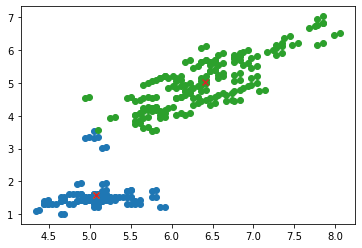

In [137]:

#Plot 3

dataset = np.zeros((len(data),2))
dataset[:,0]=height;
dataset[:,1]=leg;

k = 2
centroids, clusters = kmeans(dataset, k)
    
clusL = np.unique(clusters)
    
    
for i in clusL:
    plt.scatter(dataset[clusters==i, 0], dataset[clusters==i, 1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='x')
    
plt.show()

[[5.1   1.428]
 [5.508 1.53 ]
 [6.12  4.59 ]]
Completed in  16  cycles
[[5.08296078 1.51453922]
 [5.96567521 4.46491453]
 [6.94875309 5.77077778]]
Average distance from cluster centre: 0.5171187504764038


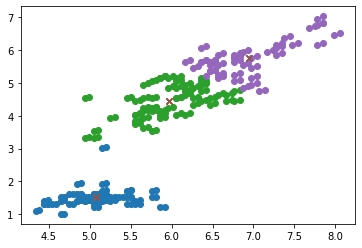

In [138]:
#Plot 4

dataset = np.zeros((len(data),2))
dataset[:,0]=height;
dataset[:,1]=leg;

k = 3
centroids, clusters = kmeans(dataset, k)
    
clusL = np.unique(clusters)
    
    
for i in clusL:
    plt.scatter(dataset[clusters==i, 0], dataset[clusters==i, 1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='x')
    
plt.show()

[[4.998 2.55 ]
 [5.202 3.366]]
Completed in  6  cycles
[[5.28928834 3.17922086]
 [6.69445985 3.01273723]]


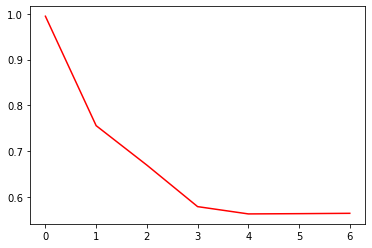

In [6]:
#Plot 5 - uncomment 'ofvplot'
dataset = np.zeros((len(data),2))
dataset[:,0]=height;
dataset[:,1]=tail;

k = 2
centroids, clusters = kmeans(dataset, k)

[[6.464 2.727]
 [5.454 3.939]
 [4.488 3.06 ]]
----------------

Iteration Number:  0
[[6.4507663  2.93908696]
 [5.34829508 3.68588525]
 [4.83832727 3.00594545]]


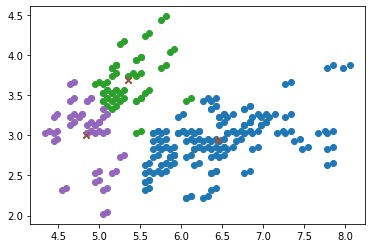

----------------

Iteration Number:  1
[[6.51488372 2.96946512]
 [5.33396825 3.66284127]
 [4.96453846 2.91463077]]


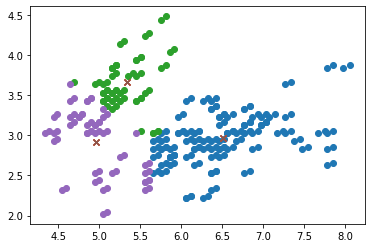

----------------

Iteration Number:  2
[[6.55541463 2.97939634]
 [5.29615873 3.68588889]
 [5.0760137  2.87843836]]


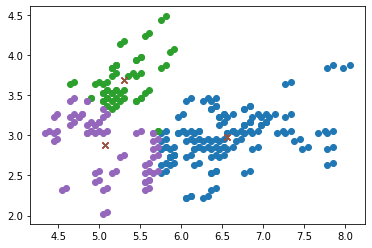

----------------

Iteration Number:  3
[[6.60577922 2.99312338]
 [5.24724242 3.68475758]
 [5.1960875  2.8352875 ]]


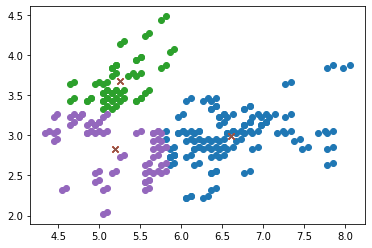

----------------

Iteration Number:  4
[[6.67329078 3.01342553]
 [5.24724242 3.68475758]
 [5.29078495 2.82656989]]


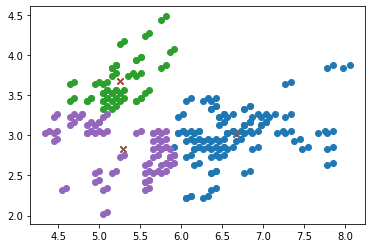

----------------

Iteration Number:  5
[[6.69838235 3.02597794]
 [5.1836     3.63256   ]
 [5.38814607 2.77508989]]


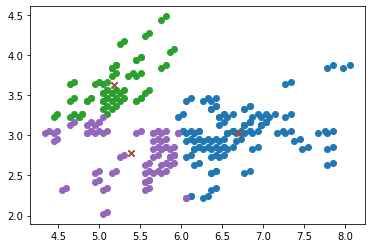

----------------

Iteration Number:  6
[[6.71758333 3.0385303 ]
 [5.11882955 3.55711364]
 [5.5264625  2.710575  ]]


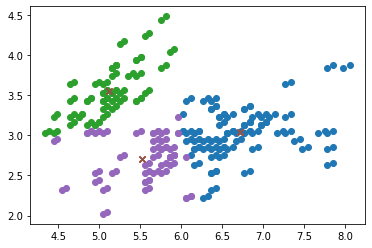

----------------

Iteration Number:  7
[[6.752176   3.05124   ]
 [5.09157143 3.50278571]
 [5.66622078 2.67896104]]


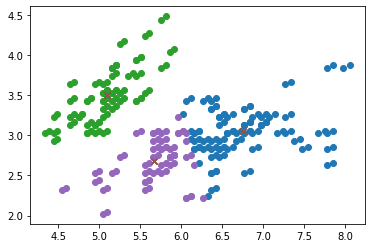

----------------

Iteration Number:  8
[[6.79631034 3.07171552]
 [5.09157143 3.50278571]
 [5.72033721 2.69030233]]


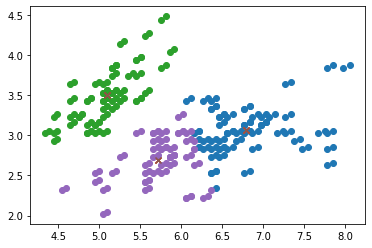

----------------

Iteration Number:  9
[[6.84820755 3.09368868]
 [5.09157143 3.50278571]
 [5.77511458 2.70577083]]


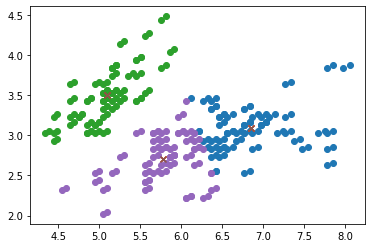

----------------

Iteration Number:  10
[[6.88550505 3.11312121]
 [5.09157143 3.50278571]
 [5.81219417 2.71345631]]


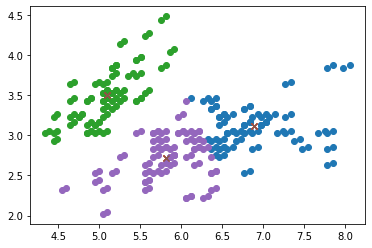

----------------

Iteration Number:  11
[[6.90477083 3.11401042]
 [5.08109    3.47942   ]
 [5.84930769 2.73145192]]


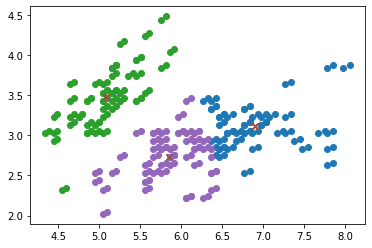

----------------

Iteration Number:  12
[[6.91562766 3.11980851]
 [5.08109    3.47942   ]
 [5.85959434 2.7335283 ]]


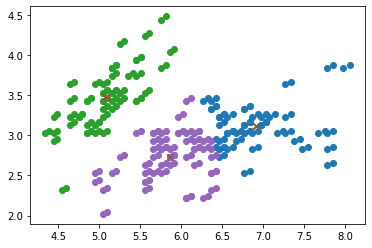

Completed in  13  cycles
[[6.91562766 3.11980851]
 [5.08109    3.47942   ]
 [5.85959434 2.7335283 ]]


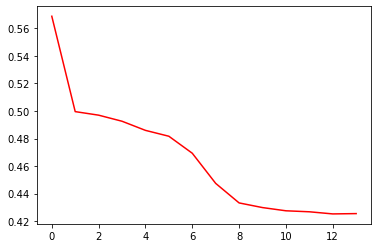

In [14]:
#Plot 6 - uncomment 'ofvplot'
dataset = np.zeros((len(data),2))
dataset[:,0]=height;
dataset[:,1]=tail;

k = 3
centroids, clusters = kmeans(dataset, k)

[[6.565 3.03 ]
 [5.304 2.754]
 [6.426 3.366]]

[[6.464 2.727]
 [5.454 3.939]
 [4.488 3.06 ]]
 
 Find out what the centroids are at each step on these. Also, plot the clusters using each iteration step's result to see how that affects it.

